In [1]:
import math
import pydot

In [2]:
class Node: 
    def __init__(self, order):
        self.order = order
        self.values = []
        self.keys = []
        self.nextKey = None
        self.parent = None
        self.is_leaf = False
    def insertINLeaf(self, leaf, value, key):
        if (self.values):
            temp1 = self.values
            for i in range(len(temp1)):
                if (value == temp1[i]):
                    self.keys[i].append(key)
                    break
                elif (value < temp1[i]):
                    self.values = self.values[:i] + [value] + self.values[i:]
                    self.keys = self.keys[:i] + [[key]] + self.keys[i:]
                    break
                elif (i+1 == len(temp1)):
                    self.values.append(value)
                    self.keys.append([key])
                    break
        else:
            self.values = [value]
            self.keys= [[key]]

In [3]:
class BplusTree:
    def __init__(self, order):
        self.root = Node(order)
        self.root.is_leaf = True
        
    def insert(self, value, key):
        value = str(value)
        old_node = self.search(value)
        old_node.insertINLeaf(old_node, value, key)
        
        if (len(old_node.values) == old_node.order):
            node1 = Node(old_node.order)
            node1.is_leaf = True
            node1.parent = old_node.parent
            mid = int(math.ceil(old_node.order/2))-1
            node1.values = old_node.values[mid+1:]
            node1.keys = old_node.keys[mid+1:]
            node1.nextKey = old_node.nextKey 
            old_node.values = old_node.values[:mid+1]
            old_node.keys = old_node.keys[:mid+1]
            old_node.nextKey = node1
            self.insertINParent(old_node, node1.values[0], node1)
        
    def search(self, value):
        current_node = self.root
        while(current_node.is_leaf == False):
            temp2 = current_node.values
            for i in range(len(temp2)):
                if (value ==  temp2[i]):
                    current_node = current_node.keys[i+1]
                    break
                elif (value < temp2[i]):
                    current_node = current_node.keys[i]
                    break
                elif (i+1 == len(current_node.values)):
                    current_node = current_node.keys[i+1]
                    break
        return current_node
    
    def find(self, value, key):
        l = self.search(value)
        for i, item in enumerate(l.values):
            if item==value:
                if key in l.keys[i]:
                    return True
                else:
                    return False
        return False
            
    def insertINParent(self, n, value, ndash):
        if (self.root == n):
            rootNode = Node(n.order)
            rootNode.values = [value]
            rootNode.keys = [n, ndash]
            self.root = rootNode
            n.parent = rootNode
            ndash.parent = rootNode
            return
        
        parentNode = n.parent
        temp3 = parentNode.keys
        for i in range(len(temp3)):
            if (temp3[i] == n):
                parentNode.values = parentNode.values[:i] + [value] + parentNode.values[i:]
                parentNode.keys = parentNode.keys[:i+1] + [ndash] + parentNode.keys[i+1:]
                if (len(parentNode.keys)>parentNode.order):
                    parentdash = Node(parentNode.order)
                    parentdash.parent = parentNode.parent
                    mid = int(math.ceil(parentNode.order/2))-1
                    parentdash.values = parentNode.values[mid+1:]
                    parentdash.keys = parentNode.keys[mid+1:]
                    value_ = parentNode.values[mid]
                    if (mid==0):
                        parentNode.values = parentNode.values[:mid+1]
                    else:
                        parentNode.values = parentNode.values[:mid]
                    parentNode.keys = parentNode.keys[:mid+1]
                    for j in parentNode.keys:
                        j.parent = parentNode
                    for j in parentdash.keys:
                        j.parent = parentdash
                    self.insertINParent(parentNode, value_, parentdash)

    def delete(self, value, key):
        node_ = self.search(value)

        temp = 0
        for i, item in enumerate(node_.values):
            if item == value:
                temp = 1

                if key in node_.keys[i]:
                    if len(node_.keys[i]) > 1:
                        node_.keys[i].pop(node_.keys[i].index(key))
                    elif node_ == self.root:
                        node_.values.pop(i)
                        node_.keys.pop(i)
                    else:
                        node_.keys[i].pop(node_.keys[i].index(key))
                        del node_.keys[i]
                        node_.values.pop(node_.values.index(value))
                        self.deleteEntry(node_, value, key)
                else:
                    print("Value not in Key")
                    return
        if temp ==0:
            print("Value not in Tree")
            return


    def deleteEntry(self, node_, value, key): 
        
        if node_.is_leaf == False:
            for i, item in enumerate(node_.keys):
                if item == key:
                    node_.keys.pop(i)
                    break
            for i, item in enumerate(node_.values):
                if item == value:
                    node_.values.pop(i)
                    break
            
            
        if self.root == node_ and len(node_.keys) == 1:
            self.root = node_.keys[0]
            node_.keys[0].parent = None
            del node_
            return
        elif (len(node_.keys) < int(math.ceil(node_.order/2)) and node_.is_leaf==False) or (len(node_.values) < int(math.ceil((node_.order-1)/2)) and node_.is_leaf==True):

            is_predecessor = 0
            parentNode = node_.parent
            PrevNode = -1
            NextNode = -1
            PrevK = -1
            PostK = -1
            for i, item in enumerate(parentNode.keys):

                if item==node_:
                    if i>0:
                        PrevNode = parentNode.keys[i-1]
                        PrevK = parentNode.values[i-1]
                        
                    if i<len(parentNode.keys)-1:
                        NextNode = parentNode.keys[i+1]
                        PostK = parentNode.values[i]
            
            if PrevNode == -1:
                ndash = NextNode
                value_ = PostK
            elif NextNode == -1:
                is_predecessor = 1
                ndash = PrevNode
                value_ = PrevK
            else:
                if len(node_.values) + len(NextNode.values) <node_.order:
                    ndash = NextNode
                    value_ = PostK
                else:
                    is_predecessor = 1
                    ndash = PrevNode
                    value_ = PrevK
                    

            if len(node_.values) + len(ndash.values) < node_.order:
                if is_predecessor==0:
                    node_, ndash = ndash, node_
                ndash.keys += node_.keys
                if node_.is_leaf == False:
                    ndash.values.append(value_)
                else:
                    ndash.nextKey = node_.nextKey
                ndash.values += node_.values
                
                if ndash.is_leaf == False:
                    for j in ndash.keys:
                        j.parent = ndash

                self.deleteEntry(node_.parent, value_, node_)
                del node_
            else:
                if is_predecessor==1:
                    if node_.is_leaf == False:
                        ndashpm = ndash.keys.pop(-1)
                        ndashkm_1 = ndash.values.pop(-1)
                        node_.keys = [ndashpm] + node_.keys
                        node_.values = [value_] + node_.values
                        parentNode = node_.parent
                        for i, item in enumerate(parentNode.values):
                            if item == value_:
                                p.values[i] = ndashkm_1
                                break
                    else:
                        ndashpm = ndash.keys.pop(-1)
                        ndashkm = ndash.values.pop(-1)
                        node_.keys = [ndashpm] + node_.keys
                        node_.values = [ndashkm] + node_.values
                        parentNode = node_.parent
                        for i, item in enumerate(p.values):
                            if item == value_:
                                parentNode.values[i] = ndashkm
                                break
                else:
                    if node_.is_leaf == False:
                        ndashp0 = ndash.keys.pop(0)
                        ndashk0 = ndash.values.pop(0)
                        node_.keys = node_.keys + [ndashp0] 
                        node_.values = node_.values + [value_]
                        parentNode = node_.parent
                        for i, item in enumerate(parentNode.values):
                            if item == value_:
                                parentNode.values[i] = ndashk0
                                break
                    else:
                        ndashp0 = ndash.keys.pop(0)
                        ndashk0 = ndash.values.pop(0)
                        node_.keys = node_.keys + [ndashp0]
                        node_.values = node_.values + [ndashk0]
                        parentNode = node_.parent
                        for i, item in enumerate(parentNode.values):
                            if item == value_:
                                parentNode.values[i] = ndash.values[0]
                                break
                                
                if ndash.is_leaf == False:
                    for j in ndash.keys:
                        j.parent = ndash  
                if node_.is_leaf == False:
                    for j in node_.keys:
                        j.parent = node_
                if parentNode.is_leaf == False:
                    for j in parentNode.keys:
                        j.parent = parentNode

In [4]:
bplustree = BplusTree(3)
for i in ['a','g','w','v','j','a','g','p','u','n','m','b','z']:
    bplustree.insert(i,i)

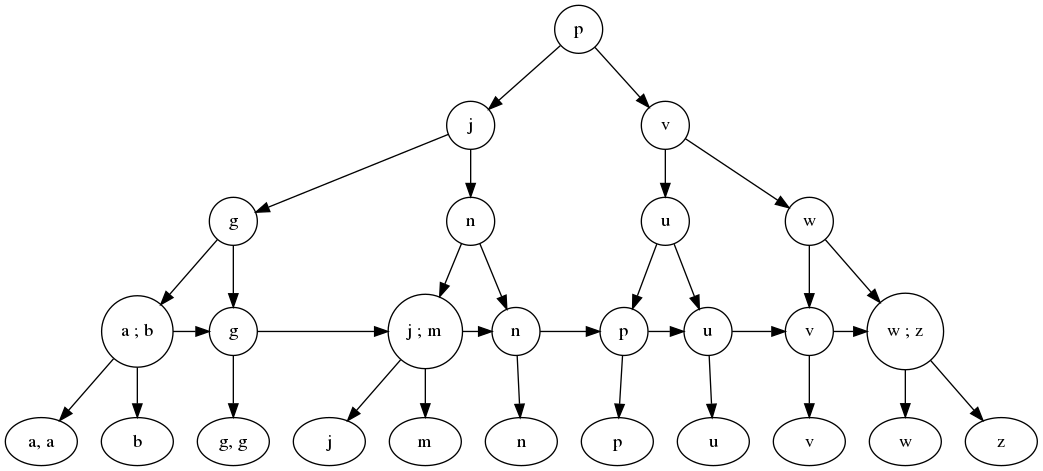

In [5]:
def plotTree(tree):
    graph = pydot.Dot(graph_type='digraph')

    lst = [tree.root]
    level = [0]
    leaf = None
    flag = 0
    lev_leaf = 0
    node1 = pydot.Node(str(level[0])+str(tree.root.values), label=" ; ".join(str(zz) for zz in tree.root.values), shape='circle')
    graph.add_node(node1)
    while (len(lst) != 0):
        x = lst.pop(0)
        lev = level.pop(0)
        if (x.is_leaf == False):
            for i, item in enumerate(x.keys):
                node1 = pydot.Node(str(lev+1)+str(item.values), label = " ; ".join(str(zz) for zz in item.values), shape='circle')
                graph.add_node(node1)
                graph.add_edge(pydot.Edge(str(lev)+str(x.values), str(lev+1)+str(item.values)))
                lst.append(item)
                level.append(lev+1)
        else:
            for i, item in enumerate(x.keys):
                node1 = pydot.Node(str(lev+1)+str(item), label = ", ".join(str(e) for e in item))
                graph.add_node(node1)
                graph.add_edge(pydot.Edge(str(lev)+str(x.values), str(lev+1)+str(item)))

            if (flag == 0):
                lev_leaf = lev
                leaf = x
                flag = 1

    while (leaf.nextKey != None):
        graph.add_edge(pydot.Edge(str(lev_leaf)+str(leaf.values), str(lev_leaf)+str(leaf.nextKey.values),  constraint=False))
        leaf = leaf.nextKey
    return graph


graph = plotTree(bplustree)
graph.write_png('bplustree.png')
from IPython.display import Image
Image('bplustree.png')

In [6]:
bplustree.delete('p','p')

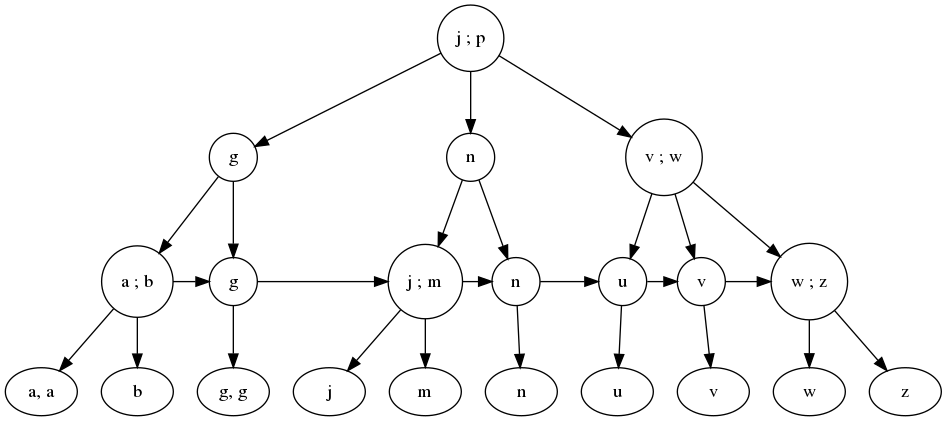

In [7]:
graph = plotTree(bplustree)
graph.write_png('bplustree.png')
from IPython.display import Image
Image('bplustree.png')

<Figure size 640x480 with 0 Axes>

Insert -- Type 1
Delete -- Type 2
Find -- Type 3
Reset -- Type 4
Exit -- Type 5

Enter operation number:2
Enter Value:3
Enter Key:we


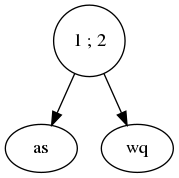

In [ ]:
from IPython import display
import pylab as pl
from PIL import Image 

record_len = int(input('Enter order of the tree'))
while(record_len<3):
    print("Order should be greater than 2")
    record_len = int(input('Enter order of the tree'))
bplustree = BplusTree(record_len)
oper=1
while(True):
    if oper!=0:
        print("Insert -- Type 1\nDelete -- Type 2\nFind -- Type 3\nReset -- Type 4\nExit -- Type 5\n")
    graph = pydot.Dot(graph_type='digraph')
    oper = int(input("Enter operation number:"))
    if oper ==5:
        break

    elif oper == 4:
        record_len = int(input('Enter order of the tree'))
        while(record_len<3):
            print("Order should be greater than 2")
            order = int(input('Enter order of the tree:'))
        bplustree = BplusTree(record_len)

    elif oper == 1:
        value = input("Enter Value:")
        key = input("Enter Key:")
        bplustree.insert(value, key)

    elif oper == 2:
        value = input("Enter Value:")
        key = input("Enter Key:")
        bplustree.delete(value, key)

    elif oper == 3:
        value = input("Enter Value:")
        key = input("Enter Key:")
        if bplustree.find(value, key):
            print("Value is present.")
        else:
            print("Value is absent.")
    else:
        print("Invalid Entry")

    graph = plotTree(bplustree)
    graph.write_png('bplustree.png')
    img = Image.open('bplustree.png')  
    display.display(img)
    _ = input("Press [enter] to continue.")

    display.clear_output(wait=True)
    display.display(pl.gcf())

## References
[SKS] Abraham Silberschatz, Henry Korth, and S. Sudarshan. Database System Concepts. 6th Edition, McGraw-Hill Education, 2010.